<a href="https://colab.research.google.com/github/luiscarlosm33/SIM_YAC_UPSE2023/blob/main/Explicito_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy  as np 
import math


In [55]:
L=10000
dx=2500
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1**(-6) #ps1-1
A=200000#ft^2

 


In [56]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

4e-05

In [57]:
#Esquema Explicito 
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2))



In [58]:
#Condiciones inicialea 
Pyac=1000
Piz=500
Pder=0
Pin=np.ones((L//dx)+2)
Pres=np.zeros((L//dx)+2)
Pres2=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(6,)

In [59]:
len(Pin)
Pexplicita.shape


(100000, 6)

In [60]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=2*Piz-Pin[1]
    elif i==len(Pin)-1:
      Pres[i]=2*Pder-Pin[len(Pin)-2]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres    


In [25]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,L//dx))

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros([N-2,N-2])


In [ ]:
for i in range(N-2):
  Matriz_resolucion[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta

    
  

In [ ]:
Matriz_resolucion2
for i in range(N-2):
  Matriz_resolucion[i,i]=1+2*Eta
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta

In [ ]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])

In [ ]:
Pcal

array([ 996.03168354,  999.98425246,  999.99993751,  999.99999975,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        ,  999.99999975,  999.99993751,
        999.98425246,  996.03168354])

In [ ]:
Pder

0

In [ ]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))
Pres

array([ 500.        ,  996.03168354,  999.98425246,  999.99993751,
        999.99999975, 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        ,  999.99999975,
        999.99993751,  999.98425246,  996.03168354,    0.        ])

In [ ]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT

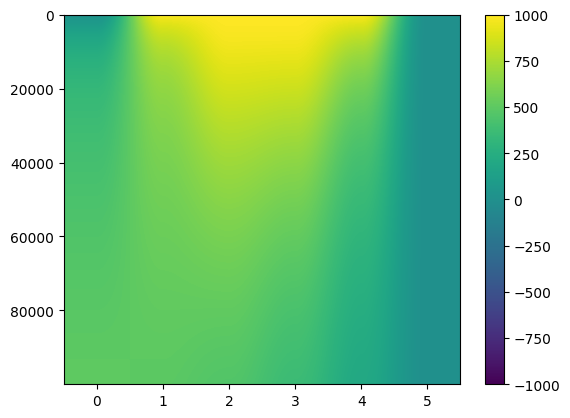

In [61]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

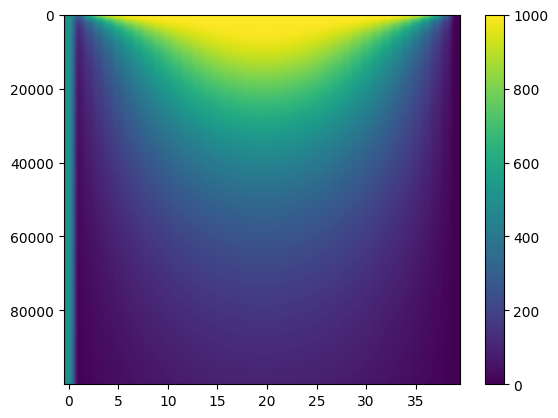

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()